In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
category = pd.read_csv('product_category_name_translation.csv')

# 데이터 Overview

## customer 데이터셋

In [4]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
customer.info()
# 총 99441개의 행과 5개의 열이 있습니다.
# 모두 문자열 데이터이기 때문에 이상치 처리는 필요하지 않습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
print(f'customer 데이터셋은 총 {len(customer)}개의 행이 있습니다.')
print(f'총 {customer["customer_unique_id"].nunique()}개의 고유한 고객이 있습니다.')
print(f'{len(customer) - customer["customer_unique_id"].nunique()}명의 고객이 중복 구매를 했음을 알 수 있습니다.')

customer 데이터셋은 총 99441개의 행이 있습니다.
총 96096개의 고유한 고객이 있습니다.
3345명의 고객이 중복 구매를 했음을 알 수 있습니다.


In [7]:
customer['customer_zip_code_prefix'].value_counts().sort_index()
# 4자리 ~ 5자리의 우편번호

customer_zip_code_prefix
1003     1
1004     2
1005     6
1006     2
1007     4
        ..
99960    2
99965    2
99970    1
99980    2
99990    1
Name: count, Length: 14994, dtype: int64

In [8]:
customer = customer.astype('string')
customer['customer_zip_code_prefix'] = customer['customer_zip_code_prefix'].str.zfill(5)

In [9]:
customer['customer_city'].value_counts()

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: Int64

In [10]:
customer['customer_state'].value_counts()
# 모두 일관적으로 2자리로 되어 있음

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: Int64

## orders 데이터셋

In [11]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
target_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
orders[target_cols] = orders[target_cols].apply(pd.to_datetime)

In [14]:
orders.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99281,97658,96476,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [15]:
target_cols = ['order_id', 'customer_id', 'order_status']
orders[target_cols] = orders[target_cols].astype('string')

In [16]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: Int64

## items 데이터셋

In [17]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [18]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
target_cols = ['order_id','product_id','seller_id']
items[target_cols] = items[target_cols].astype('string')
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

In [20]:
items.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


<Axes: >

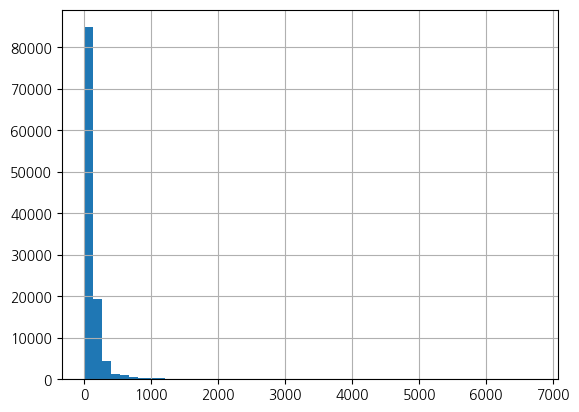

In [21]:
items['price'].hist(bins=50)

<Axes: >

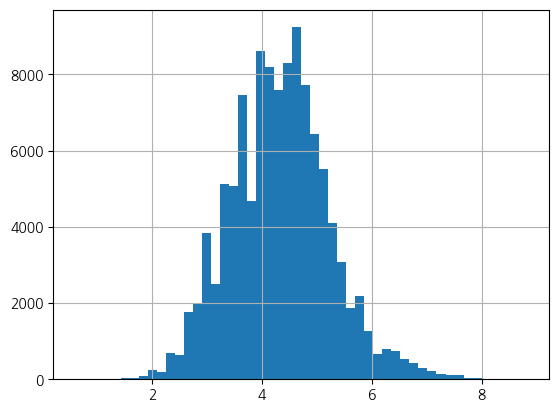

In [22]:
np.log1p(items['price']).hist(bins=50)

<Axes: >

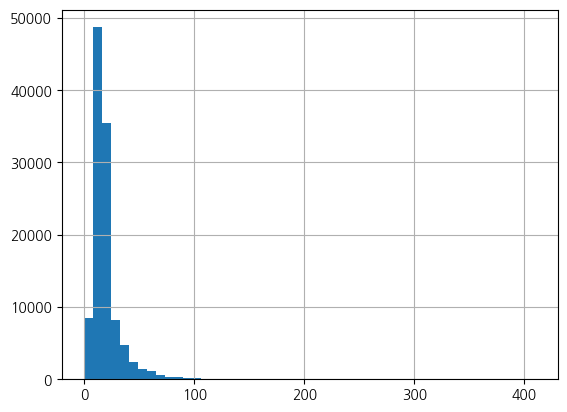

In [23]:
items['freight_value'].hist(bins=50)

## payments 데이터셋

In [24]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
payments['payment_sequential'].value_counts().sort_index()

payment_sequential
1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
16        6
17        6
18        6
19        6
20        4
21        4
22        3
23        2
24        2
25        2
26        2
27        1
28        1
29        1
Name: count, dtype: int64

In [27]:
payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

<Axes: >

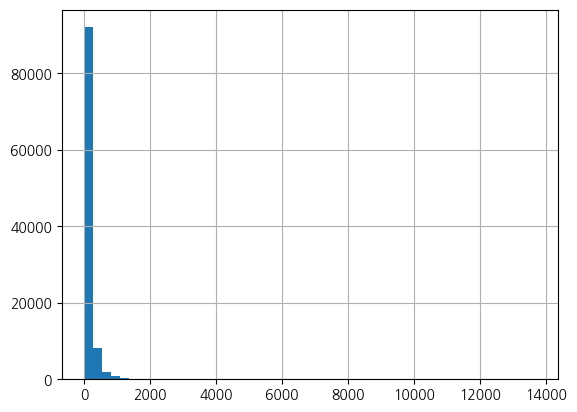

In [28]:
payments['payment_value'].hist(bins=50)

<Axes: >

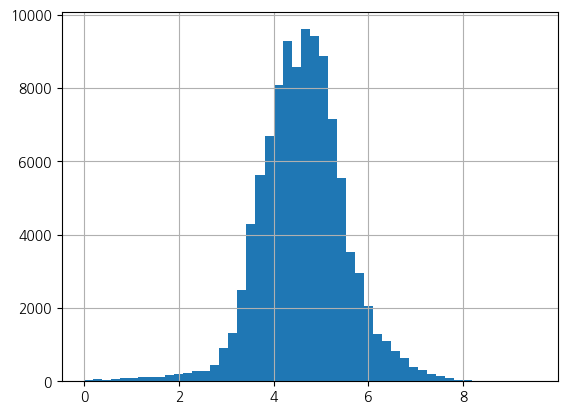

In [29]:
np.log1p(payments['payment_value']).hist(bins=50)

In [30]:
target_cols = ['order_id','payment_type']
payments[target_cols] = payments[target_cols].astype('string')

## reviews 데이터셋

In [31]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [32]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [34]:
target_cols = ['review_id','order_id','review_comment_title','review_comment_message']
reviews[target_cols] = reviews[target_cols].astype('string')
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp'] = pd.to_datetime(reviews['review_answer_timestamp'])

## products 데이터셋

In [35]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [36]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [37]:
target_cols = ['product_id','product_category_name']
products[target_cols] = products[target_cols].astype('string')

## sellers 데이터셋

In [38]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [39]:
target_cols = ['seller_id','seller_zip_code_prefix','seller_city','seller_state']
sellers[target_cols] = sellers[target_cols].astype('string')
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].str.zfill(5)

## category 데이터셋

In [40]:
category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [41]:
target_cols = ['product_category_name','product_category_name_english']
category[target_cols] = category[target_cols].astype('string')

## geolocation 데이터셋

In [42]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [43]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [44]:
target_cols = ['geolocation_zip_code_prefix','geolocation_city','geolocation_state']
geolocation[target_cols] = geolocation[target_cols].astype('string')
geolocation['geolocation_zip_code_prefix'] = geolocation['geolocation_zip_code_prefix'].str.zfill(5)

## 요약
### customer 테이블

|변수|설명|
|---|---|
|customer_id|고객 고유 아이디(한 주문에 하나의 아이디)|
|customer_unique_id|고객 고유 식별자|
|customer_zip_code_prefix|고객 우편번호 접두사|
|customer_city|고객 도시|
|customer_state|고객 주|

### orders 테이블
|변수|설명|
|---|---|
|order_id|주문 고유 아이디|
|customer_id|고객 고유 아이디|
|order_status|주문 상태|
|order_purchase_timestamp|주문 구매 일시|
|order_approved_at|주문 승인 일시|
|order_delivered_carrier_date|주문 배송 시작 일시|
|order_delivered_customer_date|주문 고객 배송 일시|
|order_estimated_delivery_date|주문 예상 배송 일시|

### items 테이블
|변수|설명|
|---|---|
|order_id|주문 고유 아이디|
|order_item_id|주문 아이템 고유 아이디(하나의 주문 내 제품 순서)|
|product_id|제품 고유 아이디|
|seller_id|판매자 고유 아이디|
|shipping_limit_date|배송 제한 일시|
|price|제품 가격|
|freight_value|운임 비용|

### payments 테이블
|변수|설명|
|---|---|
|order_id|주문 고유 아이디|
|payment_sequential|결제 순서(여러 결제 수단 선택 시)|
|payment_type|결제 유형|
|payment_installments|결제 할부 수|
|payment_value|결제 금액|

### reviews 테이블
|변수|설명|
|---|---|
|review_id|리뷰 고유 아이디|
|order_id|주문 고유 아이디|
|review_score|리뷰 점수(1~5)|
|review_comment_title|리뷰 제목|
|review_comment_message|리뷰 내용|
|review_creation_date|리뷰 생성 일시|
|review_answer_timestamp|리뷰 답변 일시|

### products 테이블
|변수|설명|
|---|---|
|product_id|제품 고유 아이디|
|product_category_name|제품 카테고리 이름|
|product_name_length|제품 이름 길이|
|product_description_length|제품 설명 길이|
|product_photos_qty|제품 사진 수|
|product_weight_g|제품 무게(g)|
|product_length_cm|제품 길이(cm)|
|product_height_cm|제품 높이(cm)|
|product_width_cm|제품 너비(cm)|

### sellers 테이블
|변수|설명|
|---|---|
|seller_id|판매자 고유 아이디|
|seller_zip_code_prefix|판매자 우편번호 접두사|
|seller_city|판매자 도시|
|seller_state|판매자 주|

### category 테이블
|변수|설명|
|---|---|
|product_category_name|제품 카테고리 이름(포르투갈어)|
|product_category_name_english|제품 카테고리 이름(영어)|

### geolocation 테이블
|변수|설명|
|---|---|
|geolocation_zip_code_prefix|우편번호 접두사|
|geolocation_lat|위도|
|geolocation_lng|경도|
|geolocation_city|도시|
|geolocation_state|주|


# 필요 데이터 요약 및 병합

In [45]:
# customer=customer[['customer_id','customer_unique_id']]
# orders=orders[['order_id','customer_id','order_status','order_purchase_timestamp']]
# items=items[['order_id','product_id','seller_id','price','freight_value']]
# payments=payments[['order_id','payment_value']]
# reviews=reviews[['order_id','review_score']]
# products=products[['product_id','product_category_name']]
# category=category[['product_category_name','product_category_name_english']]

In [46]:
df = orders.merge(customer, on='customer_id', how='left')\
      .merge(items, on='order_id', how='left')\
        .merge(products, on='product_id', how='left')\
            .merge(category, on='product_category_name', how='left')\
                .merge(payments, on='order_id', how='left')\
                    .merge(reviews, on='order_id', how='left')\
                    .merge(sellers, on='seller_id', how='left')


In [47]:
df=df[df['order_status']=='delivered']
df.drop('order_status', axis=1, inplace=True)

In [48]:
a=df.groupby('customer_unique_id').agg({'order_id':'nunique'}).reset_index()
a['재구매 여부'] = a['order_id'].apply(lambda x: 1 if x > 1 else 0)
a.drop('order_id', axis=1, inplace=True)
df = df.merge(a, on='customer_unique_id', how='left')

In [49]:
pd.set_option('display.max_columns', None)
df

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state,재구매 여부
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,09350,maua,SP,1
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,09350,maua,SP,1
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,<NA>,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,09350,maua,SP,1
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,31570,belo horizonte,SP,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,<NA>,<NA>,2018-08-18,2018-08-22 19:07:58,14840,guariba,SP,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115718,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,<NA>,So uma peça que veio rach

<Axes: xlabel='review_score', ylabel='Density'>

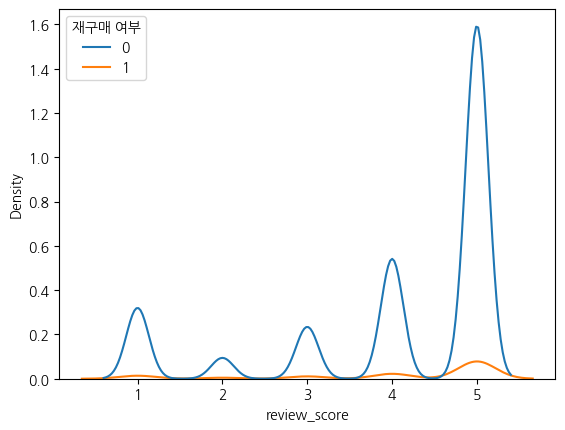

In [50]:
sns.kdeplot(data=df,x='review_score',hue='재구매 여부')

In [51]:
# 각 고객의 첫 번째 주문 데이터만 추출
first_orders = df.sort_values('order_purchase_timestamp').drop_duplicates('customer_unique_id')

# 배송 소요 시간 계산
first_orders['delivery_time'] = (first_orders['order_delivered_customer_date'] - first_orders['order_purchase_timestamp']).dt.days

# 집단별 리뷰 점수 및 배송 시간 평균 비교
activation_analysis = first_orders.groupby('재구매 여부').agg({
    'review_score': 'mean',
    'delivery_time': 'mean'
}).reset_index()

print("--- Activation 분석 (첫 구매 경험) ---")
print(activation_analysis)

--- Activation 분석 (첫 구매 경험) ---
   재구매 여부  review_score  delivery_time
0       0      4.151907      12.109863
1       1      4.197913      11.900393


In [52]:
# 리뷰 메시지 작성 비율 (Referral)
df['review_exists'] = df['review_comment_message'].notnull().astype(int)

retention_referral = df.groupby('재구매 여부').agg({
    'review_exists': 'mean',     # 리뷰 작성률
    'review_score': 'mean'       # 전체 평균 평점
}).reset_index()

print("\n--- Referral 분석 (리뷰 참여도) ---")
print(retention_referral)


--- Referral 분석 (리뷰 참여도) ---
   재구매 여부  review_exists  review_score
0       0       0.416614      4.076248
1       1       0.402387      4.136146


In [53]:
# Revenue: 건당 결제 금액 및 할부 횟수
revenue_analysis = df.groupby('재구매 여부').agg({
    'payment_value': 'mean',        # $AOV = \frac{\sum Payment Value}{Total Orders}$
    'payment_installments': 'mean' # 평균 할부 횟수
}).reset_index()

print("\n--- Revenue 분석 (수익성) ---")
print(revenue_analysis)


--- Revenue 분석 (수익성) ---
   재구매 여부  payment_value  payment_installments
0       0     172.260862              2.912677
1       1     165.917916              3.305809


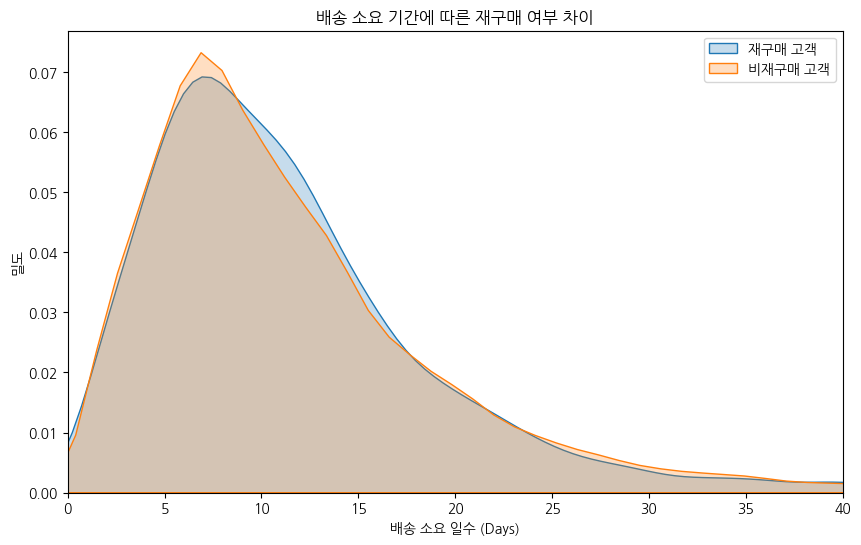

In [54]:
# 배송 소요 기간(Days) 계산
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

plt.figure(figsize=(10, 6))
# 재구매 여부에 따른 배송 기간 분포 (KDE Plot)
sns.kdeplot(data=df[df['재구매 여부']==1], x='delivery_days', label='재구매 고객', fill=True)
sns.kdeplot(data=df[df['재구매 여부']==0], x='delivery_days', label='비재구매 고객', fill=True)

plt.title('배송 소요 기간에 따른 재구매 여부 차이')
plt.xlabel('배송 소요 일수 (Days)')
plt.ylabel('밀도')
plt.xlim(0, 40) # 일반적인 배송 범위로 제한
plt.legend()
plt.show()

C:\Users\songj\AppData\Local\Temp\ipykernel_21860\1621877452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='재구매 여부', y='freight_ratio', palette='Set2')


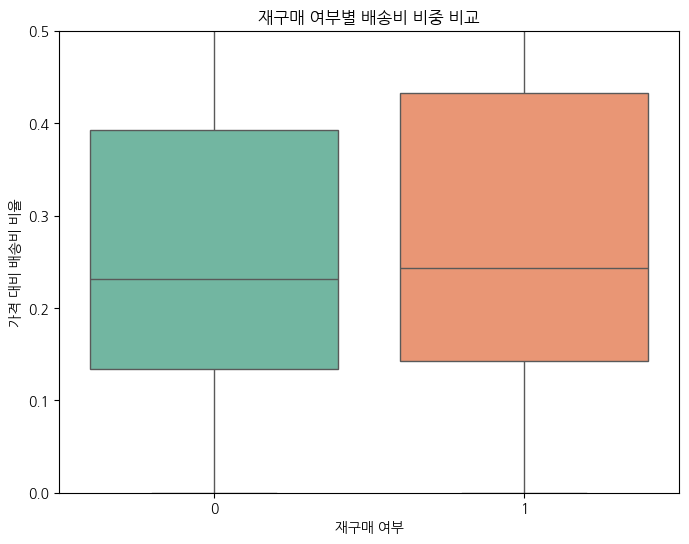

In [55]:
# 배송비 비중 계산
df['freight_ratio'] = df['freight_value'] / df['price']

plt.figure(figsize=(8, 6))
# Boxplot으로 배송비 비중 분포 확인
sns.boxplot(data=df, x='재구매 여부', y='freight_ratio', palette='Set2')

plt.title('재구매 여부별 배송비 비중 비교')
plt.ylabel('가격 대비 배송비 비율')
plt.ylim(0, 0.5) # 이상치 제외하고 50% 미만 위주로 관찰
plt.show()

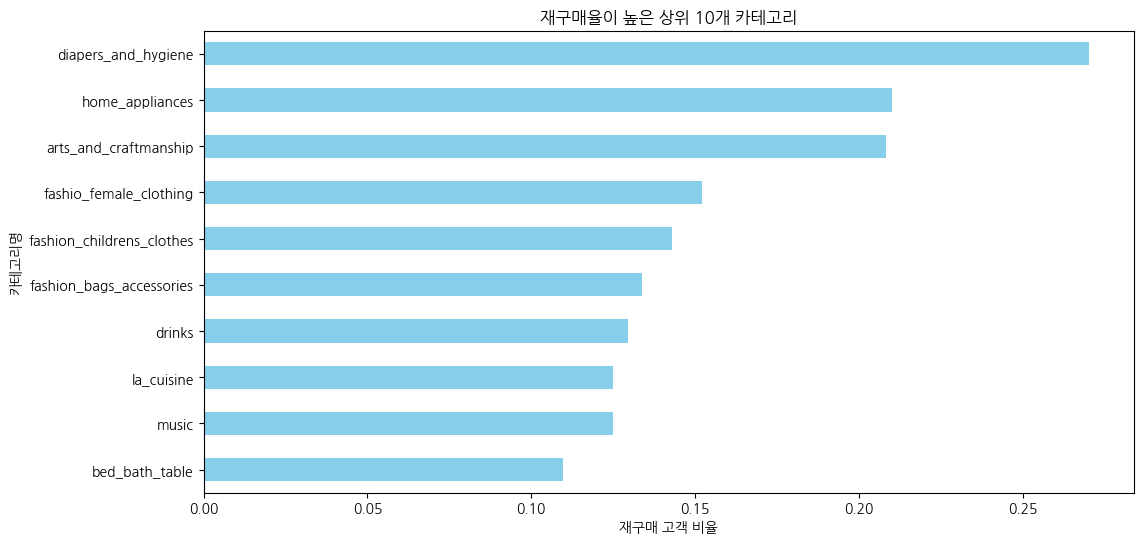

In [56]:
# 카테고리별 재구매율 계산
category_repurchase = df.groupby('product_category_name_english')['재구매 여부'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
category_repurchase.plot(kind='barh', color='skyblue')
plt.title('재구매율이 높은 상위 10개 카테고리')
plt.xlabel('재구매 고객 비율')
plt.ylabel('카테고리명')
plt.gca().invert_yaxis() # 높은 순서대로 정렬
plt.show()

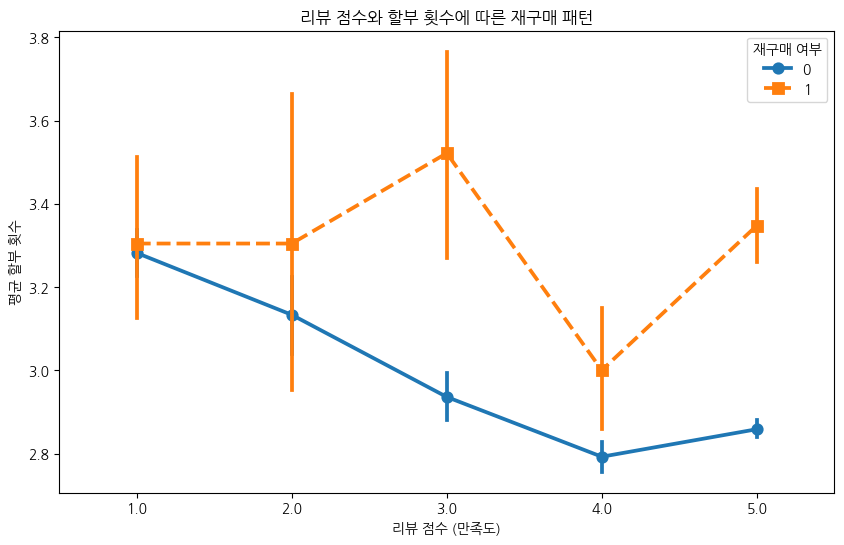

In [57]:
plt.figure(figsize=(10, 6))
# 재구매 여부와 리뷰 점수, 그리고 할부 횟수의 관계
sns.pointplot(data=df, x='review_score', y='payment_installments', hue='재구매 여부', markers=["o", "s"], linestyles=["-", "--"])

plt.title('리뷰 점수와 할부 횟수에 따른 재구매 패턴')
plt.xlabel('리뷰 점수 (만족도)')
plt.ylabel('평균 할부 횟수')
plt.show()

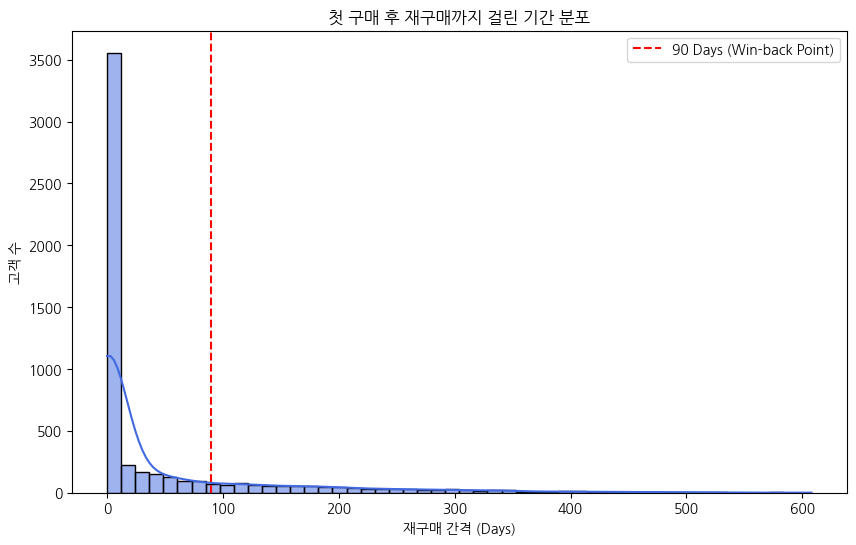

In [58]:
# 재구매 고객만 필터링하여 주문 간격 계산
repurchasers = df[df['재구매 여부'] == 1].copy()
repurchasers = repurchasers.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# 다음 주문일 가져오기
repurchasers['next_order_date'] = repurchasers.groupby('customer_unique_id')['order_purchase_timestamp'].shift(-1)
repurchasers['days_to_next_purchase'] = (repurchasers['next_order_date'] - repurchasers['order_purchase_timestamp']).dt.days

# 90일 이내 재구매 비중 시각화
plt.figure(figsize=(10, 6))
sns.histplot(repurchasers['days_to_next_purchase'].dropna(), bins=50, kde=True, color='royalblue')
plt.axvline(90, color='red', linestyle='--', label='90 Days (Win-back Point)')
plt.title('첫 구매 후 재구매까지 걸린 기간 분포')
plt.xlabel('재구매 간격 (Days)')
plt.ylabel('고객 수')
plt.legend()
plt.show()

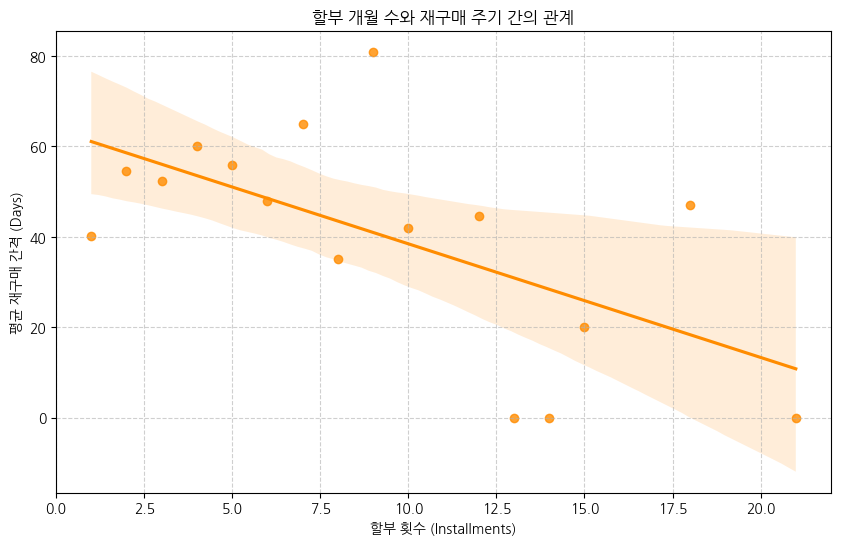

In [59]:
# 할부 횟수별 평균 재구매 간격 계산
installments_interval = repurchasers.groupby('payment_installments')['days_to_next_purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=installments_interval, x='payment_installments', y='days_to_next_purchase', color='darkorange')
plt.title('할부 개월 수와 재구매 주기 간의 관계')
plt.xlabel('할부 횟수 (Installments)')
plt.ylabel('평균 재구매 간격 (Days)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\songj\AppData\Local\Temp\ipykernel_21860\4196233761.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_repurchase, x='delivery_performance', y='재구매 여부',


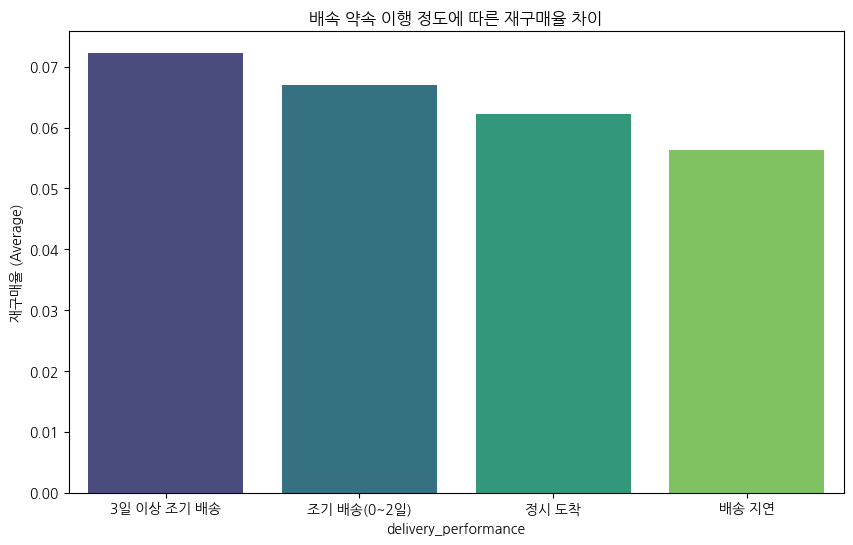

In [60]:
# 배송 차이(Variance) 계산 (음수일수록 약속보다 빨리 도착)
df['delivery_variance'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# 배송 상태 그룹화
def get_delivery_status(x):
    if x <= -3: return '3일 이상 조기 배송'
    elif x < 0: return '조기 배송(0~2일)'
    elif x == 0: return '정시 도착'
    else: return '배송 지연'

df['delivery_performance'] = df['delivery_variance'].apply(get_delivery_status)

# 그룹별 재구매율 계산
performance_repurchase = df.groupby('delivery_performance')['재구매 여부'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_repurchase, x='delivery_performance', y='재구매 여부', 
            order=['3일 이상 조기 배송', '조기 배송(0~2일)', '정시 도착', '배송 지연'], palette='viridis')
plt.title('배속 약속 이행 정도에 따른 재구매율 차이')
plt.ylabel('재구매율 (Average)')
plt.show()

C:\Users\songj\AppData\Local\Temp\ipykernel_21860\3762598205.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_repurchase, x='delivery_performance', y='review_score',


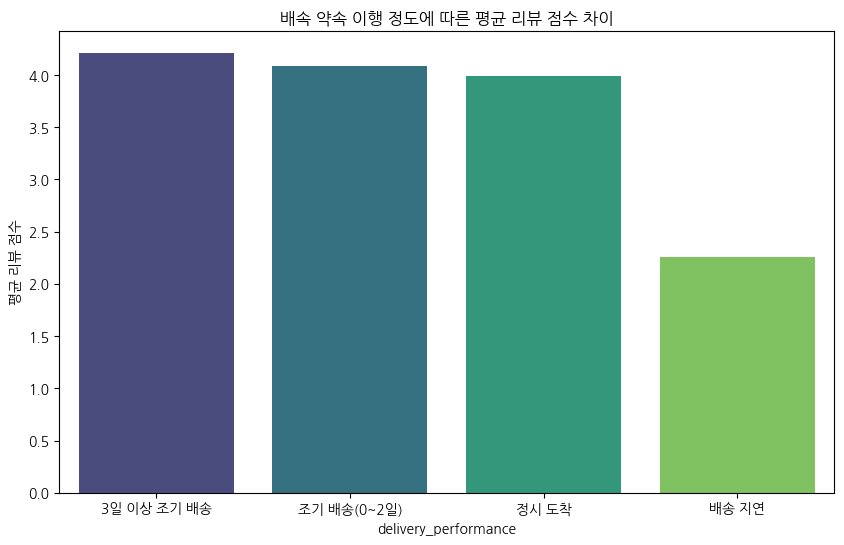

In [61]:
# 배송 차이(Variance) 계산 (음수일수록 약속보다 빨리 도착)
df['delivery_variance'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days

# 배송 상태 그룹화
def get_delivery_status(x):
    if x <= -3: return '3일 이상 조기 배송'
    elif x < 0: return '조기 배송(0~2일)'
    elif x == 0: return '정시 도착'
    else: return '배송 지연'

df['delivery_performance'] = df['delivery_variance'].apply(get_delivery_status)

# 그룹별 평균 리뷰 점수 계산
performance_repurchase = df.groupby('delivery_performance')['review_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=performance_repurchase, x='delivery_performance', y='review_score', 
            order=['3일 이상 조기 배송', '조기 배송(0~2일)', '정시 도착', '배송 지연'], palette='viridis')
plt.title('배속 약속 이행 정도에 따른 평균 리뷰 점수 차이')
plt.ylabel('평균 리뷰 점수')
plt.show()

In [66]:
# 월 단위로 내림(YYYY-MM-01)
df["order_month"] = df["order_purchase_timestamp"].dt.to_period("M").dt.to_timestamp()

# 고객별 첫 구매월 = cohort_month
first = df.groupby("customer_id")["order_month"].min().rename("cohort_month")
df = df.join(first, on="customer_id")

# 코호트 기준으로 몇 개월 뒤인지(cohort_index)
df["cohort_index"] = (
    (df["order_month"].dt.year - df["cohort_month"].dt.year) * 12
    + (df["order_month"].dt.month - df["cohort_month"].dt.month)
)

# 코호트 x n개월차 활성 고객 수
cohort_counts = (
    df.groupby(["cohort_month", "cohort_index"])["customer_unique_id"]
      .nunique()
      .unstack(fill_value=np.nan)  # 여기서 NaN 유지 => "빈칸" 처리 가능
)

# 0개월차(첫 구매월) 고객 수로 나눠 retention rate
cohort_sizes = cohort_counts[0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

retention.head()

ValueError: columns overlap but no suffix specified: Index(['cohort_month'], dtype='object')

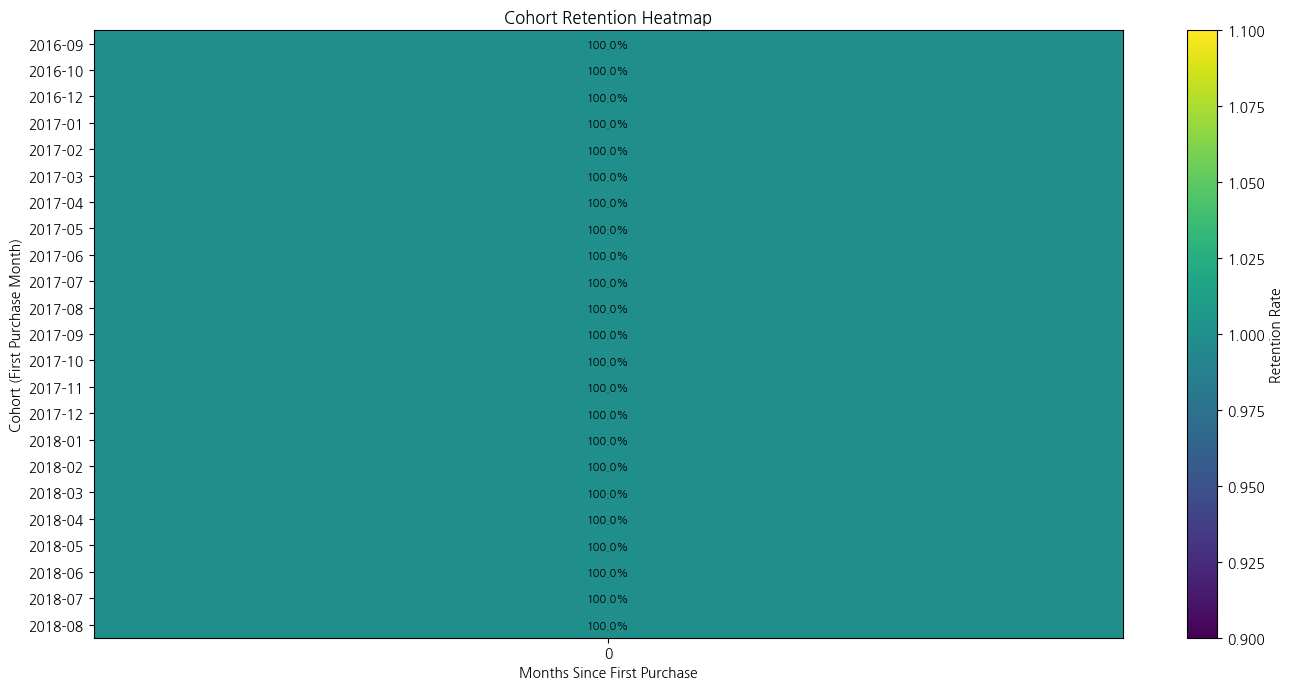

In [65]:
import matplotlib.pyplot as plt

data = retention.copy()

# NaN은 마스킹해서 "안 칠해지게" 만들기
masked = np.ma.masked_invalid(data.values)

fig, ax = plt.subplots(figsize=(14, 7))
im = ax.imshow(masked, aspect="auto")  # 색상은 기본값 사용

# 축 라벨
ax.set_yticks(np.arange(data.shape[0]))
ax.set_yticklabels([d.strftime("%Y-%m") for d in data.index])

ax.set_xticks(np.arange(data.shape[1]))
ax.set_xticklabels(data.columns)

ax.set_xlabel("Months Since First Purchase")
ax.set_ylabel("Cohort (First Purchase Month)")
ax.set_title("Cohort Retention Heatmap")

# 컬러바 (0~1 비율)
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Retention Rate")

# 셀에 % 텍스트 찍기(선택)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        val = data.iat[i, j]
        if pd.notnull(val):
            ax.text(j, i, f"{val*100:.1f}%", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()